# Установка необходимых библиотек

In [2]:
%pip install pandas seaborn matplotlib ipywidgets

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.




[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Импорт библиотек

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime  # На всякий случай, если понадобится
import ipywidgets as widgets

# Настраиваем спокойную тему оформления
sns.set_theme()

# Загружаем и предварительно обрабатываем данные из файла vgsales-12-4-2019-short.csv

Пропущенные данные заменяем на "неизвестно". Редкие категории в разделах Genre, Platform, Publisher, Developer группируем, объединив и переименовав из в "Прочее", для более приятного восприятия (если значение меньше 5).

Выводим все категории и пример первых заполненных строк данных.

In [4]:
data = pd.read_csv('U:/JKTV24/Group/Yanchuk/Программирование/02_Variables_Input/project/vgsales-12-4-2019-short.csv')

data.fillna("неизвестно", inplace=True)

C:\Users\pupil\AppData\Local\Temp\ipykernel_10980\2900882353.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'неизвестно' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.fillna("неизвестно", inplace=True)


# Функции

In [5]:
# Параметр порога, ниже которого редкие категории объединяются в "Прочее"
THRESHOLD = 5

def group_rare_categories(series, threshold=THRESHOLD):
    """
    Принимает Series (например, Genre, Platform или Publisher).
    Категории, встречающиеся реже threshold раз, переименовывает в "Прочее".
    Возвращает Series с изменёнными категориями.
    """
    value_counts = series.value_counts()
    rare_categories = value_counts[value_counts < threshold].index
    return series.apply(lambda x: "Прочее" if x in rare_categories else x)

# Применяем функцию к выбранным столбцам
data['Genre'] = group_rare_categories(data['Genre'], THRESHOLD)
data['Platform'] = group_rare_categories(data['Platform'], THRESHOLD)
data['Publisher'] = group_rare_categories(data['Publisher'], THRESHOLD)
data['Developer'] = group_rare_categories(data['Developer'], THRESHOLD)

In [26]:
group_rare_categories(data['Genre'], THRESHOLD)

0                  Sports
1                Platform
2                  Racing
3                 Shooter
4                  Sports
               ...       
55788           Adventure
55789           Adventure
55790           Adventure
55791    Action-Adventure
55792          Simulation
Name: Genre, Length: 55793, dtype: object

In [27]:
group_rare_categories(data['Platform'], THRESHOLD)

0         Wii
1         NES
2         Wii
3          PC
4         Wii
         ... 
55788      PC
55789     PS4
55790    XOne
55791     PS4
55792      PC
Name: Platform, Length: 55793, dtype: object

In [28]:
group_rare_categories(data['Publisher'], THRESHOLD)

0        Nintendo
1        Nintendo
2        Nintendo
3          Прочее
4        Nintendo
           ...   
55788      Прочее
55789      Прочее
55790      Прочее
55791     Unknown
55792      Прочее
Name: Publisher, Length: 55793, dtype: object

In [29]:
group_rare_categories(data['Developer'], THRESHOLD)

0            Nintendo EAD
1            Nintendo EAD
2            Nintendo EAD
3        PUBG Corporation
4            Nintendo EAD
               ...       
55788              Прочее
55789              Прочее
55790              Прочее
55791              Прочее
55792              Прочее
Name: Developer, Length: 55793, dtype: object

# Data.info()

In [6]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55792 entries, 0 to 55791
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rank           55792 non-null  int64 
 1   Name           55792 non-null  object
 2   Genre          55792 non-null  object
 3   ESRB_Rating    55792 non-null  object
 4   Platform       55792 non-null  object
 5   Publisher      55792 non-null  object
 6   Developer      55792 non-null  object
 7   Critic_Score   55792 non-null  object
 8   User_Score     55792 non-null  object
 9   Total_Shipped  55792 non-null  object
 10  Global_Sales   55792 non-null  object
 11  NA_Sales       55792 non-null  object
 12  PAL_Sales      55792 non-null  object
 13  JP_Sales       55792 non-null  object
 14  Other_Sales    55792 non-null  object
 15  Year           55792 non-null  object
dtypes: int64(1), object(15)
memory usage: 6.8+ MB


,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year
0,1,Wii Sports,Sports,E,Wii,Nintendo,Nintendo EAD,7.7,неизвестно,82.86,неизвестно,неизвестно,неизвестно,неизвестно,неизвестно,2006.0
1,2,Super Mario Bros.,Platform,неизвестно,NES,Nintendo,Nintendo EAD,10.0,неизвестно,40.24,неизвестно,неизвестно,неизвестно,неизвестно,неизвестно,1985.0
2,3,Mario Kart Wii,Racing,E,Wii,Nintendo,Nintendo EAD,8.2,9.1,37.14,неизвестно,неизвестно,неизвестно,неизвестно,неизвестно,2008.0
3,4,PlayerUnknown's Battlegrounds,Shooter,неизвестно,PC,Прочее,PUBG Corporation,неизвестно,неизвестно,36.6,неизвестно,неизвестно,неизвестно,неизвестно,неизвестно,2017.0
4,5,Wii Sports Resort,Sports,E,Wii,Nintendo,Nintendo EAD,8.0,8.8,33.09,неизвестно,неизвестно,неизвестно,неизвестно,неизвестно,2009.0


Проверка допустимости значений столбцов
-
Проверяет, что в указаном столбце col_name есть значение value, при ошибке возвращает False.

In [30]:
def check_existence_in_dataset(col_name: str, value) -> bool:
    """
    Проверяет, есть ли значение value в указанном столбце col_name.
    Если такого значения в данных нет, возвращает False.
    """
    unique_values = data[col_name].unique()
    return value in unique_values
check_existence_in_dataset('Year', 2020)

True

Вывод и визуализация глобальных продаж по году и основной платформе.
-
Принимает год **year**. Если год отсутствует в данных, выводит сообщение и возвращает пустой DataFrame.
В противном случае выводит статистику продаж по платфомам и строит визуализацию. Возвращает отфильтрованный DataFrame.

In [32]:
def get_sales_by_year(year: int) -> pd.DataFrame:
    if not check_existence_in_dataset('Year', year):
        print("Нет данных по запрошенному параметру, измените вводимые данные на корректные.")
        return pd.DataFrame()

    data_year = data[data['Year'] == year]
    data_year['Global_Sales'] = pd.to_numeric(data_year['Global_Sales'], errors='coerce')  
    sales_by_platform = data_year.groupby('Platform')['Global_Sales'].sum().reset_index()
    sales_by_platform.sort_values('Global_Sales', ascending=False, inplace=True)
    print(f"Статистика продаж по платформам за {year} год:")
    display(sales_by_platform)
    return data_year
get_sales_by_year(2020)

Статистика продаж по платформам за 2020 год:


C:\Users\pupil\AppData\Local\Temp\ipykernel_10980\3970093949.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_year['Global_Sales'] = pd.to_numeric(data_year['Global_Sales'], errors='coerce')


,Platform,Global_Sales
22,PSP,1.06
7,GBA,0.66
19,PS3,0.35
4,DS,0.35
16,PC,0.18
29,Wii,0.17
23,PSV,0.16
24,SAT,0.15
0,3DS,0.06
31,X360,0.03


,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year
1006,1007,Plague Inc: Evolved,Strategy,неизвестно,PC,Прочее,Прочее,неизвестно,неизвестно,2.0,NaN,неизвестно,неизвестно,неизвестно,неизвестно,2020.0
2940,2941,Final Fantasy Type-0,Role-Playing,RP,PSP,Unknown,Square Enix,неизвестно,неизвестно,неизвестно,0.81,неизвестно,неизвестно,0.81,неизвестно,2020.0
2941,2942,Raft,Action,неизвестно,PC,Unknown,Прочее,неизвестно,неизвестно,0.81,NaN,неизвестно,неизвестно,неизвестно,неизвестно,2020.0
3538,3539,Dragon Quest Monsters: Caravan Heart,Role-Playing,неизвестно,GBA,Unknown,TOSE,неизвестно,неизвестно,неизвестно,0.66,неизвестно,неизвестно,0.64,0.02,2020.0
6810,6811,Imagine: Makeup Artist,Simulation,E,DS,Ubisoft,Global A Entertainment,неизвестно,неизвестно,неизвестно,0.29,0.27,неизвестно,неизвестно,0.02,2020.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53061,53062,Battle Chef Brigade,Action,неизвестно,PS4,Прочее,Прочее,неизвестно,неизвестно,неизвестно,NaN,неизвестно,неизвестно,неизвестно,неизвестно,2020.0
54006,54007,Journey To the Savage Planet,Adventure,неизвестно,PS4,505 Games,Прочее,неизвестно,неизвестно,неизвестно,NaN,неизвестно,неизвестно,неизвестно,неизвестно,2020.0
54007,54008,Journey To the Savage Planet,Adventure,неизвестно,XOne,505 Games,Прочее,неизвестно,неизвестно,неизвестно,NaN,неизвестно,неизвестно,неизвестно,неизвестно,2020.0
54008,54009,Journey To the Savage Planet,Adventure,неизвестно,PC,505 Games,Прочее,неизвестно,неизвестно,неизвестно,NaN,неизвестно,неизвестно,неизвестно,неизвестно,2020.0


Построение круговой диаграммы по продажам за указанный год.(разрабатывается)
-
Строит круговую диаграмму глобальных продаж за указанный год.
    - Радиус долей (процент) отражает 'Global_Sales'.
    - Цвет отражает 'Critic_Score' (от бледного к насыщенному).
    - Если количество жанров > 10, используется легенда, иначе - подписи сегментов.
    - 'Прочее' включается уже в исходном DataFrame.

In [40]:
def plot_pie_chart_by_year(year: int):
    data_year = get_sales_by_year(year)
    if data_year.empty:
        return

    # Группируем по жанру
    sales_genre = data_year.groupby('Genre', as_index=False).agg({
        'Global_Sales': 'sum',
        'Critic_Score': 'mean'  # для цвета возьмём средний Critic_Score
    })

    # При построении цветовой карты будем использовать Critic_Score
    # Чем выше Critic_Score, тем насыщеннее цвет.

    # Сначала normalize Critic_Score (чтобы получить значения от 0 до 1)
    # Если Critic_Score == "неизвестное", при mean это могла быть строка,
    # но по идее в датафрейме изначально должны быть числа или "неизвестное".
    # С учётом fillna("неизвестное") придётся исключить такие строки/преобразовать.
    numeric_mask = pd.to_numeric(sales_genre['Critic_Score'], errors='coerce').notna()
    # Чтобы не терять все строки, заменим "неизвестное" на 0
    sales_genre.loc[~numeric_mask, 'Critic_Score'] = 0

    # Теперь преобразуем в float
    sales_genre['Critic_Score'] = sales_genre['Critic_Score'].astype(float)

    min_score = sales_genre['Critic_Score'].min()
    max_score = sales_genre['Critic_Score'].max()
    score_range = max_score - min_score if max_score != min_score else 1

    normalized_colors = (sales_genre['Critic_Score'] - min_score) / score_range

    # Создадим колormap
    cmap = sns.light_palette("blue", as_cmap=True)

    # Генерируем список цветов на основе нормированных значений Critic_Score
    colors = [cmap(x) for x in normalized_colors]

    # Построение круговой диаграммы
    fig, ax = plt.subplots(figsize=(8, 6))
    total_sales = sales_genre['Global_Sales'].sum()

    # Pie chart
    if len(sales_genre) > 10:
        # Без подписей, но с легендой
        wedges, _, autotexts = ax.pie(
            sales_genre['Global_Sales'],
            colors=colors,
            startangle=140,
            autopct=lambda pct: f"{pct:.1f}%"  # процент от общего
        )
        ax.legend(wedges, sales_genre['Genre'], title="Жанр", bbox_to_anchor=(1, 0.5), loc='center left')
    else:
        # Подписи прямо на сегментах
        wedges, texts, autotexts = ax.pie(
            sales_genre['Global_Sales'],
            labels=sales_genre['Genre'],
            colors=colors,
            startangle=140,
            autopct=lambda pct: f"{pct:.1f}%"
        )

    ax.set_title(f"Круговая диаграмма по жанрам за {year} год \n(Общие продажи: {total_sales:.2f} млн)")
    plt.show()
plot_pie_chart_by_year(2021)

Нет данных по запрошенному параметру, измените вводимые данные на корректные.


Функция, которая строит точечную диаграмму.
-
Диаграмма строится, используя только те данные, где указаны все значения. В противном случае игра не указывается.
В диаграмме указываются следующие значения:
- x = оценка критиков
- y = оценка потребителей
- цвет *(hue)* = жанр
- размер *(size)* = размер глобальных продаж

Возвращает отсортированные данные.

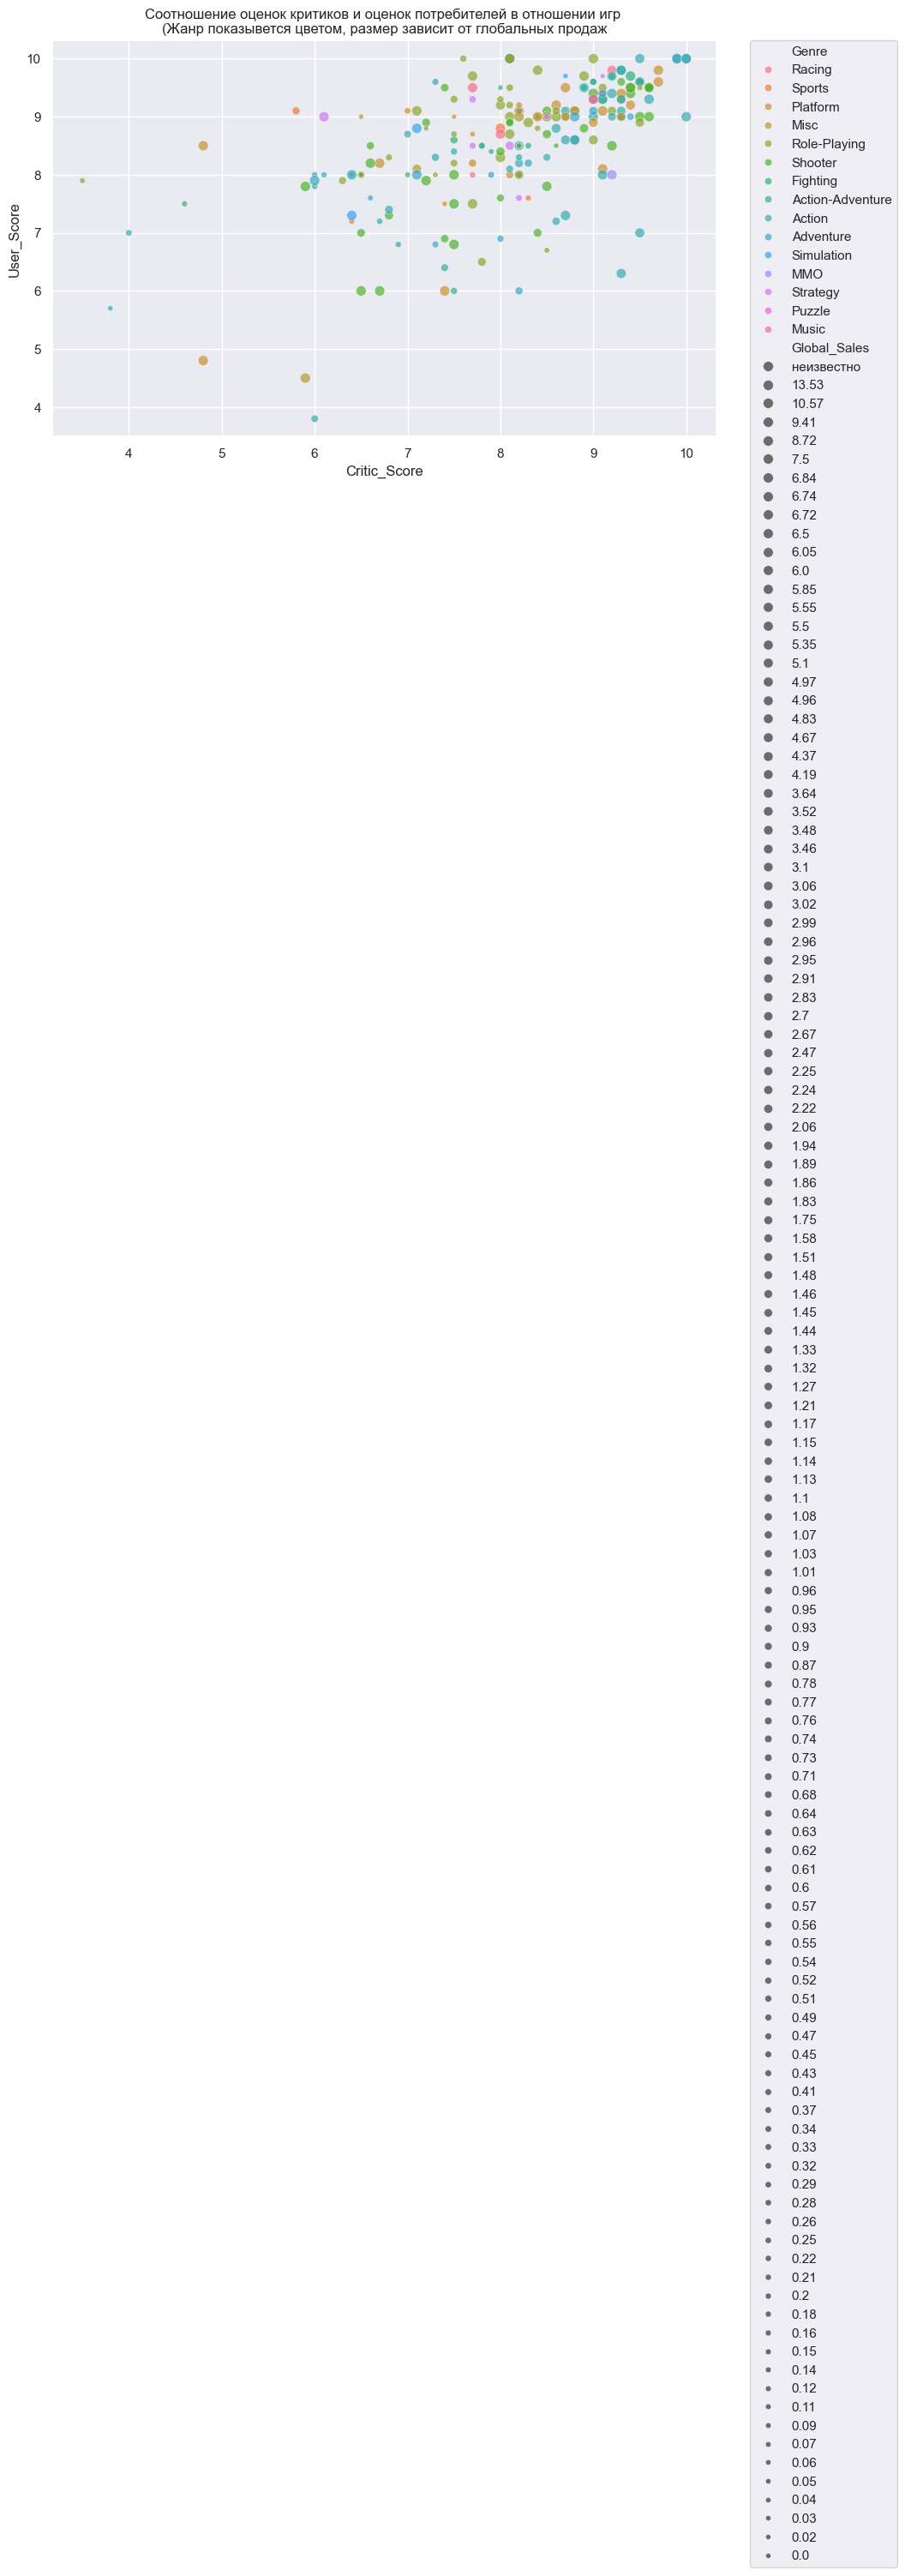

,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year
2,3,Mario Kart Wii,Racing,E,Wii,Nintendo,Nintendo EAD,8.2,9.1,37.14,неизвестно,неизвестно,неизвестно,неизвестно,неизвестно,2008.0
4,5,Wii Sports Resort,Sports,E,Wii,Nintendo,Nintendo EAD,8.0,8.8,33.09,неизвестно,неизвестно,неизвестно,неизвестно,неизвестно,2009.0
6,7,New Super Mario Bros.,Platform,E,DS,Nintendo,Nintendo EAD,9.1,8.1,30.8,неизвестно,неизвестно,неизвестно,неизвестно,неизвестно,2006.0
8,9,New Super Mario Bros. Wii,Platform,E,Wii,Nintendo,Nintendo EAD,8.6,9.2,30.22,неизвестно,неизвестно,неизвестно,неизвестно,неизвестно,2009.0
11,12,Wii Play,Misc,E,Wii,Nintendo,Nintendo EAD,5.9,4.5,28.02,неизвестно,неизвестно,неизвестно,неизвестно,неизвестно,2007.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48498,48499,The Legend of Zelda Collector's Edition,Adventure,E,GC,Nintendo,Nintendo Software Technology Corporation,10.0,10.0,неизвестно,неизвестно,неизвестно,неизвестно,неизвестно,неизвестно,2003.0
51097,51098,Water Warfare,Shooter,E10,WW,Hudson Entertainment,Hudson Entertainment,7.2,7.9,неизвестно,неизвестно,неизвестно,неизвестно,неизвестно,неизвестно,2009.0
54537,54538,Perception,Adventure,неизвестно,NS,Прочее,Прочее,6.0,7.9,неизвестно,неизвестно,неизвестно,неизвестно,неизвестно,неизвестно,2017.0
55423,55424,Thumper,Music,E10,NS,Прочее,Drool,9.0,9.3,неизвестно,неизвестно,неизвестно,неизвестно,неизвестно,неизвестно,2017.0


In [36]:
def scatter_plot_genre_color():
    # Уберём строки, где Critic_Score или User_Score = "неизвестное"
    data_scatter = data.copy()
    data_scatter = data_scatter[data_scatter['Critic_Score'] != "неизвестное"]
    data_scatter = data_scatter[data_scatter['User_Score'] != "неизвестное"]
    # Преобразуем в float
    data_scatter['Critic_Score'] = pd.to_numeric(data_scatter['Critic_Score'], errors='coerce')  
    data_scatter['User_Score'] = pd.to_numeric(data_scatter['User_Score'], errors='coerce')
    data_scatter = data_scatter.dropna(subset=['Critic_Score', 'User_Score'])  

    plt.figure(figsize=(10, 6))
    scatter = sns.scatterplot(
        data=data_scatter,
        x='Critic_Score',
        y='User_Score',
        hue='Genre',
        size='Global_Sales',
        alpha=0.7,
        palette='husl'
    )
    scatter.set_title("Соотношение оценок критиков и оценок потребителей в отношении игр \n(Жанр показывется цветом, размер зависит от глобальных продаж")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    plt.show()
    return data_scatter
scatter_plot_genre_color()

Строительство точечной диаграммы.
-
Диаграмма строится, используя только те данные, где указаны все значения. В противном случае игра не указывается.
В диаграмме указываются следующие значения:
- x = оценка критиков
- y = оценка потребителей
- цвет *(hue)* = платформа
- размер *(size)* = размер глобальных продаж

Возвращает отсортированные данные.

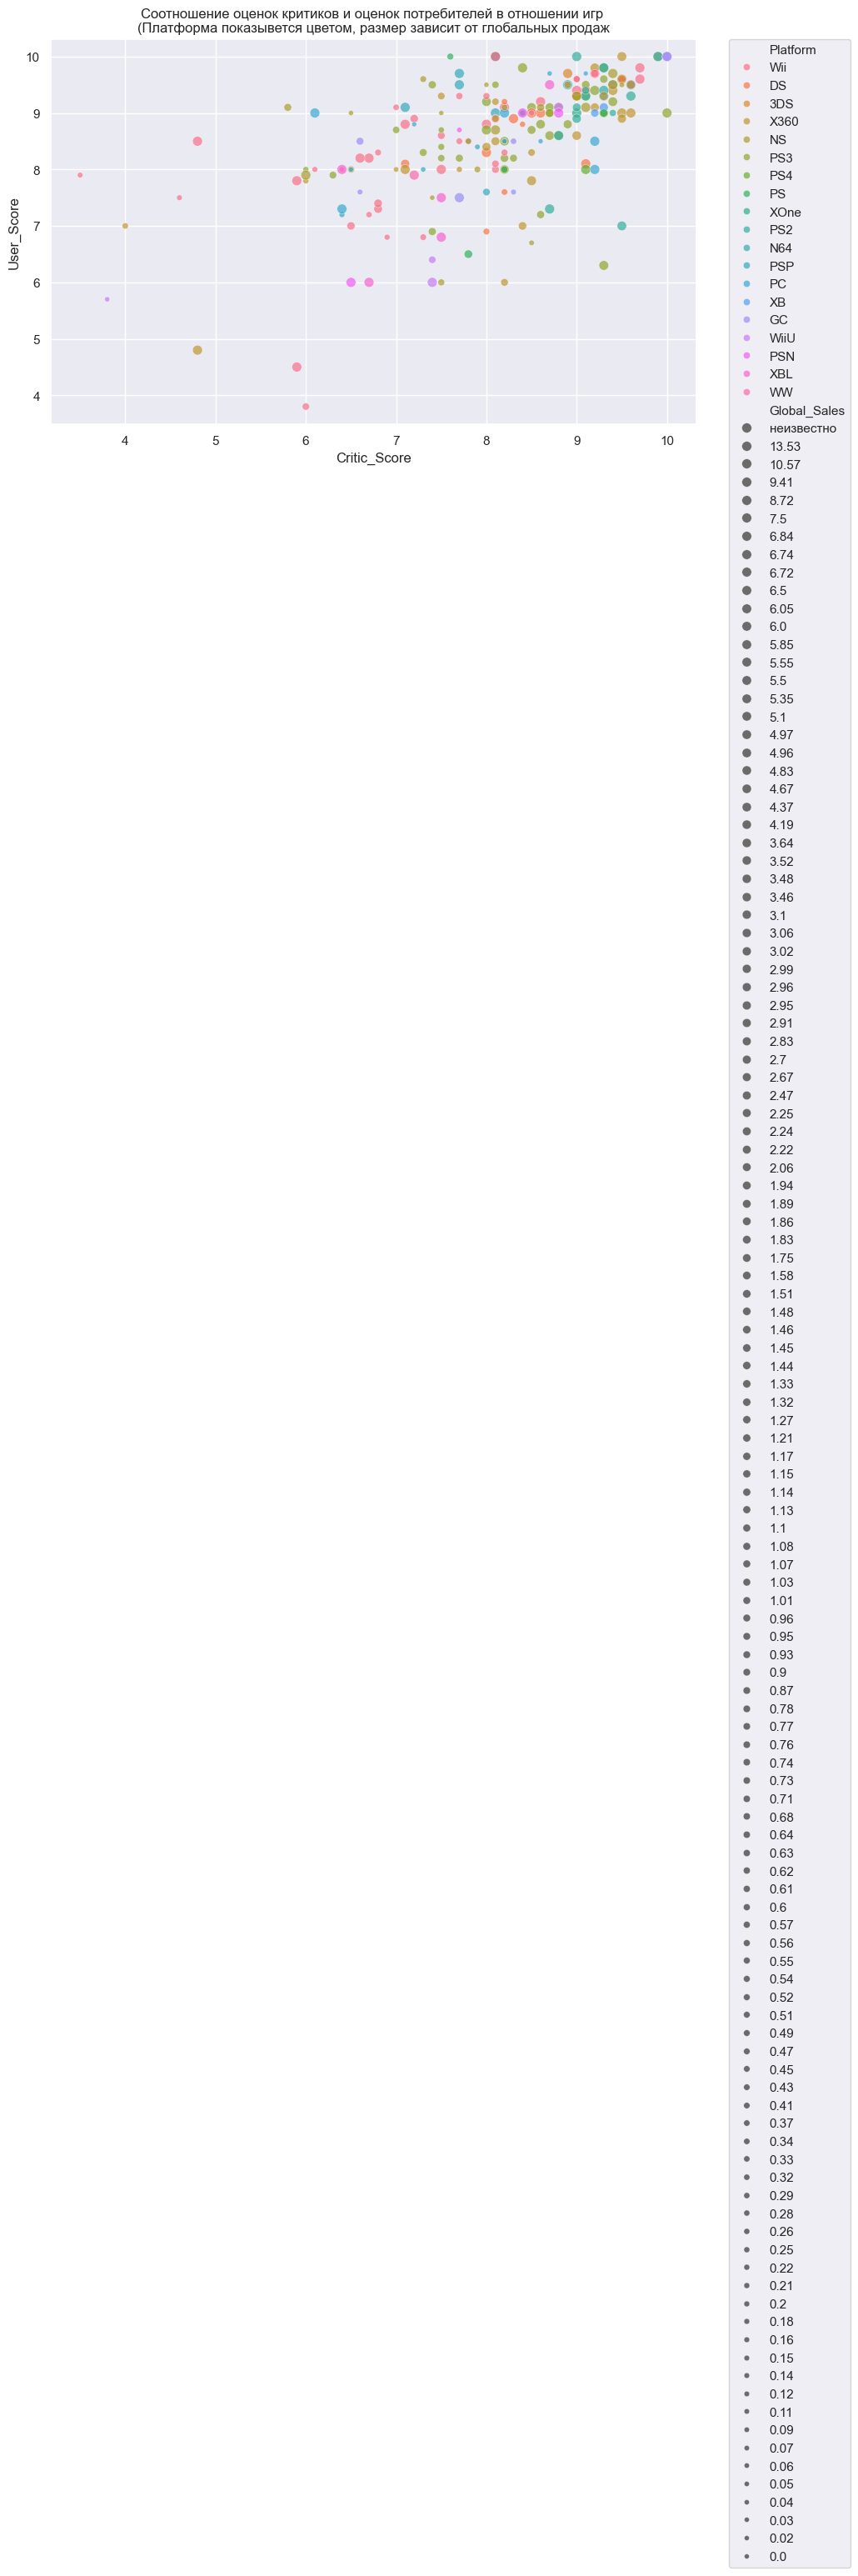

,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year
2,3,Mario Kart Wii,Racing,E,Wii,Nintendo,Nintendo EAD,8.2,9.1,37.14,неизвестно,неизвестно,неизвестно,неизвестно,неизвестно,2008.0
4,5,Wii Sports Resort,Sports,E,Wii,Nintendo,Nintendo EAD,8.0,8.8,33.09,неизвестно,неизвестно,неизвестно,неизвестно,неизвестно,2009.0
6,7,New Super Mario Bros.,Platform,E,DS,Nintendo,Nintendo EAD,9.1,8.1,30.8,неизвестно,неизвестно,неизвестно,неизвестно,неизвестно,2006.0
8,9,New Super Mario Bros. Wii,Platform,E,Wii,Nintendo,Nintendo EAD,8.6,9.2,30.22,неизвестно,неизвестно,неизвестно,неизвестно,неизвестно,2009.0
11,12,Wii Play,Misc,E,Wii,Nintendo,Nintendo EAD,5.9,4.5,28.02,неизвестно,неизвестно,неизвестно,неизвестно,неизвестно,2007.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48498,48499,The Legend of Zelda Collector's Edition,Adventure,E,GC,Nintendo,Nintendo Software Technology Corporation,10.0,10.0,неизвестно,неизвестно,неизвестно,неизвестно,неизвестно,неизвестно,2003.0
51097,51098,Water Warfare,Shooter,E10,WW,Hudson Entertainment,Hudson Entertainment,7.2,7.9,неизвестно,неизвестно,неизвестно,неизвестно,неизвестно,неизвестно,2009.0
54537,54538,Perception,Adventure,неизвестно,NS,Прочее,Прочее,6.0,7.9,неизвестно,неизвестно,неизвестно,неизвестно,неизвестно,неизвестно,2017.0
55423,55424,Thumper,Music,E10,NS,Прочее,Drool,9.0,9.3,неизвестно,неизвестно,неизвестно,неизвестно,неизвестно,неизвестно,2017.0


In [35]:
def scatter_plot_platform_color():
    # Уберём строки, где Critic_Score или User_Score = "неизвестное"
    data_scatter = data.copy()
    data_scatter = data_scatter[data_scatter['Critic_Score'] != "неизвестное"]
    data_scatter = data_scatter[data_scatter['User_Score'] != "неизвестное"]
    # Преобразуем в float
    data_scatter['Critic_Score'] = pd.to_numeric(data_scatter['Critic_Score'], errors='coerce')  
    data_scatter['User_Score'] = pd.to_numeric(data_scatter['User_Score'], errors='coerce')
    data_scatter = data_scatter.dropna(subset=['Critic_Score', 'User_Score']) 

    plt.figure(figsize=(10, 6))
    scatter = sns.scatterplot(
        data=data_scatter,
        x='Critic_Score',
        y='User_Score',
        hue='Platform',
        size='Global_Sales',
        alpha=0.7,
        palette='husl'
    )
    scatter.set_title("Соотношение оценок критиков и оценок потребителей в отношении игр \n(Платформа показывется цветом, размер зависит от глобальных продаж")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    plt.show()

    return data_scatter
scatter_plot_platform_color()

Функция для составления сводной таблицы.
-
Создается сводная таблица по следующим парамерам:
- ряд     Создаёт сводную таблицу по выбранным параметрам.
    - rows, cols - кортежи колонок, которые будут
        - использоваться в качестве строк и столбцов.
    - values - поле для агрегации (по умолчанию Global_Sales).
    - aggfunc - функция агрегации (по умолчанию sum).

In [37]:
def create_pivot_table(rows=('Year', 'Genre'),
                       cols=('Platform',),
                       values='Global_Sales',
                       aggfunc='sum') -> pd.DataFrame:
    """
    Создаёт сводную таблицу по выбранным параметрам.
    rows, cols - кортежи колонок, которые будут
                 использоваться в качестве строк и столбцов.
    values - поле для агрегации (по умолчанию Global_Sales).
    aggfunc - функция агрегации (по умолчанию sum).

    Возвращает pd.DataFrame (pivot).
    """
    data[values] = pd.to_numeric(data[values], errors='coerce')

    pivot_data = pd.pivot_table(
        data,
        index=list(rows),
        columns=list(cols),
        values=values,
        aggfunc=aggfunc,
        fill_value=0
    )

    print(f"Сводная таблица по параметрам: rows={rows}, cols={cols}, values={values}, aggfunc={aggfunc}")
    display(pivot_data)

    return pivot_data
create_pivot_table()

Сводная таблица по параметрам: rows=('Year', 'Genre'), cols=('Platform',), values=Global_Sales, aggfunc=sum


Platform                 2600  3DO  3DS  5200  7800  ACPC   AJ  AST  Amig  \
Year       Genre                                                            
1970.0     Action        0.21  0.0  0.0   0.0   0.0   0.0  0.0  0.0   0.0   
           Adventure     0.00  0.0  0.0   0.0   0.0   0.0  0.0  0.0   0.0   
           Fighting      0.00  0.0  0.0   0.0   0.0   0.0  0.0  0.0   0.0   
           Misc          0.00  0.0  0.0   0.0   0.0   0.0  0.0  0.0   0.0   
           Platform      0.00  0.0  0.0   0.0   0.0   0.0  0.0  0.0   0.0   
...                       ...  ...  ...   ...   ...   ...  ...  ...   ...   
неизвестно Shooter       0.00  0.0  0.0   0.0   0.0   0.0  0.0  0.0   0.0   
           Simulation    0.00  0.0  0.0   0.0   0.0   0.0  0.0  0.0   0.0   
           Sports        0.00  0.0  0.0   0.0   0.0   0.0  0.0  0.0   0.0   
           Strategy      0.00  0.0  0.0   0.0   0.0   0.0  0.0  0.0   0.0   
           Visual Novel  0.00  0.0  0.0   0.0   0.0   0.0  0.0  0.0   0.0   

Platform                 And  ...  WiiU  WinP  X360   XB  XBL  XOne  ZXS  iOS  \
Year       Genre              ...                                               
1970.0     Action        0.0  ...   0.0   0.0  0.00  0.0  0.0   0.0  0.0  0.0   
           Adventure     0.0  ...   0.0   0.0  0.00  0.0  0.0   0.0  0.0  0.0   
           Fighting      0.0  ...   0.0   0.0  0.00  0.0  0.0   0.0  0.0  0.0   
           Misc          0.0  ...   0.0   0.0  0.00  0.0  0.0   0.0  0.0  0.0   
           Platform      0.0  ...   0.0   0.0  0.00  0.0  0.0   0.0  0.0  0.0   
...                      ...  ...   ...   ...   ...  ...  ...   ...  ...  ...   
неизвестно Shooter       0.0  ...   0.0   0.0  0.00  0.0  0.0   0.0  0.0  0.0   
           Simulation    0.0  ...   0.0   0.0  0.00  0.0  0.0   0.0  0.0  0.0   
           Sports        0.0  ...   0.0   0.0  0.05  0.0  0.0   0.0  0.0  0.0   
           Strategy      0.0  ...   0.0   0.0  0.00  0.0  0.0   0.0  0.0  0.0   
           Visual Novel  0.0  ...   0.0   0.0  0.00  0.0  0.0   0.0  0.0  0.0   

Platform                 iQue  Прочее  
Year       Genre                       
1970.0     Action         0.0     0.0  
           Adventure      0.0     0.0  
           Fighting       0.0     0.0  
           Misc           0.0     0.0  
           Platform       0.0     0.0  
...                       ...     ...  
неизвестно Shooter        0.0     0.0  
           Simulation     0.0     0.0  
           Sports         0.0     0.0  
           Strategy       0.0     0.0  
           Visual Novel   0.0     0.0  

[648 rows x 67 columns]

Platform                 2600  3DO  3DS  5200  7800  ACPC   AJ  AST  Amig  \
Year       Genre                                                            
1970.0     Action        0.21  0.0  0.0   0.0   0.0   0.0  0.0  0.0   0.0   
           Adventure     0.00  0.0  0.0   0.0   0.0   0.0  0.0  0.0   0.0   
           Fighting      0.00  0.0  0.0   0.0   0.0   0.0  0.0  0.0   0.0   
           Misc          0.00  0.0  0.0   0.0   0.0   0.0  0.0  0.0   0.0   
           Platform      0.00  0.0  0.0   0.0   0.0   0.0  0.0  0.0   0.0   
...                       ...  ...  ...   ...   ...   ...  ...  ...   ...   
неизвестно Shooter       0.00  0.0  0.0   0.0   0.0   0.0  0.0  0.0   0.0   
           Simulation    0.00  0.0  0.0   0.0   0.0   0.0  0.0  0.0   0.0   
           Sports        0.00  0.0  0.0   0.0   0.0   0.0  0.0  0.0   0.0   
           Strategy      0.00  0.0  0.0   0.0   0.0   0.0  0.0  0.0   0.0   
           Visual Novel  0.00  0.0  0.0   0.0   0.0   0.0  0.0  0.0   0.0   

Platform                 And  ...  WiiU  WinP  X360   XB  XBL  XOne  ZXS  iOS  \
Year       Genre              ...                                               
1970.0     Action        0.0  ...   0.0   0.0  0.00  0.0  0.0   0.0  0.0  0.0   
           Adventure     0.0  ...   0.0   0.0  0.00  0.0  0.0   0.0  0.0  0.0   
           Fighting      0.0  ...   0.0   0.0  0.00  0.0  0.0   0.0  0.0  0.0   
           Misc          0.0  ...   0.0   0.0  0.00  0.0  0.0   0.0  0.0  0.0   
           Platform      0.0  ...   0.0   0.0  0.00  0.0  0.0   0.0  0.0  0.0   
...                      ...  ...   ...   ...   ...  ...  ...   ...  ...  ...   
неизвестно Shooter       0.0  ...   0.0   0.0  0.00  0.0  0.0   0.0  0.0  0.0   
           Simulation    0.0  ...   0.0   0.0  0.00  0.0  0.0   0.0  0.0  0.0   
           Sports        0.0  ...   0.0   0.0  0.05  0.0  0.0   0.0  0.0  0.0   
           Strategy      0.0  ...   0.0   0.0  0.00  0.0  0.0   0.0  0.0  0.0   
           Visual Novel  0.0  ...   0.0   0.0  0.00  0.0  0.0   0.0  0.0  0.0   

Platform                 iQue  Прочее  
Year       Genre                       
1970.0     Action         0.0     0.0  
           Adventure      0.0     0.0  
           Fighting       0.0     0.0  
           Misc           0.0     0.0  
           Platform       0.0     0.0  
...                       ...     ...  
неизвестно Shooter        0.0     0.0  
           Simulation     0.0     0.0  
           Sports         0.0     0.0  
           Strategy       0.0     0.0  
           Visual Novel   0.0     0.0  

[648 rows x 67 columns]

# Вывод статистических меток.
Из уже отсортированных значений выводит среднее значение, медиану, максимум и минимум для глобальных продаж, оценок критикоа, оценок пользователей.


In [38]:
def print_statistics(filtered_data: pd.DataFrame):
    # Обработка "неизвестное"
    data_stats = filtered_data.copy()
    for col in ['Critic_Score', 'User_Score', 'Global_Sales']:
        # Заменяем "неизвестно" на NaN
        data_stats[col] = pd.to_numeric(data_stats[col], errors='coerce')

    metrics = {}
    for col in ['Global_Sales', 'Critic_Score', 'User_Score']:
        valid_values = data_stats[col].dropna()
        if len(valid_values) == 0:
            metrics[col] = {
                'mean': None,
                'median': None,
                'max': None,
                'min': None
            }
        else:
            metrics[col] = {
                'mean': valid_values.mean(),
                'median': valid_values.median(),
                'max': valid_values.max(),
                'min': valid_values.min()
            }

    print("Статистические метрики (Глобальные продажи, оценка критиков, оценка пользователей): ")
    for col, vals in metrics.items():
        print(f"--- {col} ---")
        print(f"  Среднее:  {vals['mean']}")
        print(f"  Медиана:  {vals['median']}")
        print(f"  Максимум: {vals['max']}")
        print(f"  Минимум:  {vals['min']}")
print_statistics(data)

Статистические метрики (Глобальные продажи, оценка критиков, оценка пользователей): 
--- Global_Sales ---
  Среднее:  0.3655029616276075
  Медиана:  0.12
  Максимум: 20.32
  Минимум:  0.0
--- Critic_Score ---
  Среднее:  7.213584212941716
  Медиана:  7.5
  Максимум: 10.0
  Минимум:  1.0
--- User_Score ---
  Среднее:  8.250595238095238
  Медиана:  8.5
  Максимум: 10.0
  Минимум:  2.0


# Кнопка, которая сохраняет текущий график.

График сохраняется под именем в котором указано время и дата сохранения в том же месте, где находится код.

In [15]:
save_button = widgets.Button(description="Сохранить график в PNG")

def save_current_figure(btn):
    import time
    filename = f"figure_{time.strftime('%Y%m%d_%H%M%S')}.png"
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    print(f"График сохранён в файл {filename}")

save_button.on_click(save_current_figure)

display(save_button)

Button(description='Сохранить график в PNG', style=ButtonStyle())

# ТЕПЛОВАЯ КАРТА (HEATMAP) КОРРЕЛЯЦИИ

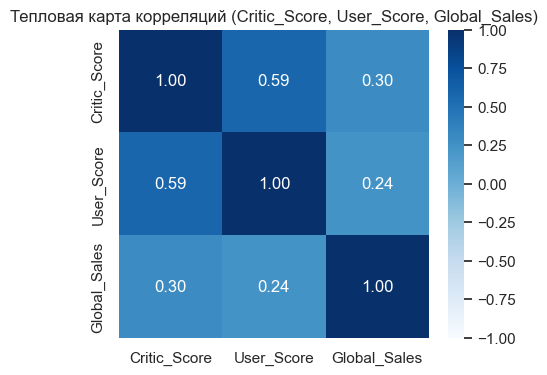

In [39]:
def plot_correlation_heatmap():
    """
    Строит тепловую карту корреляции только между Critic_Score, User_Score, Global_Sales.
    Annot=True, fmt=".2f".
    Обязательный заголовок, спокойный стиль.
    """

    # Выберем нужные столбцы
    corr_data = data[['Critic_Score', 'User_Score', 'Global_Sales']].copy()

    # Заменим "неизвестное" на NaN
    for col in corr_data.columns:
        corr_data[col] = pd.to_numeric(corr_data[col], errors='coerce')

    # Считаем корреляцию
    corr_matrix = corr_data.corr()

    plt.figure(figsize=(5, 4))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='Blues', vmin=-1, vmax=1)
    plt.title("Тепловая карта корреляций (Critic_Score, User_Score, Global_Sales)")
    plt.show()
plot_correlation_heatmap()

# ИНТЕРАКТИВНЫЕ ВИДЖЕТЫ ДЛЯ ФИЛЬТРАЦИИ
Пример, как можно сделать базовый набор фильтров:
  Dropdown по году, жанру, платформе; MultipleSelect по издателю/разработчику и т.д.

Dropdown(description='Год:', options=('Все',), value='Все')

Dropdown(description='Жанр:', options=('Все', 'Action', 'Action-Adventure', 'Adventure', 'Board Game', 'Educat…

Dropdown(description='Платформа:', options=('Все', '2600', '3DO', '3DS', '5200', '7800', 'ACPC', 'AJ', 'AST', …

SelectMultiple(description='Издатели:', index=(0,), options=('Все', '10TACLE Studios', '10tons', '10tons Ltd',…

SelectMultiple(description='Разработчики:', index=(0,), options=('Все', '07th Expansion', '10tons Ltd', '11 bi…

Количество строк в отфильтрованном DataFrame: 7667
Статистические метрики (Глобальные продажи, оценка критиков, оценка пользователей): 
--- Global_Sales ---
  Среднее:  0.4142876759354617
  Медиана:  0.15
  Максимум: 20.32
  Минимум:  0.0
--- Critic_Score ---
  Среднее:  6.840234375
  Медиана:  7.0
  Максимум: 10.0
  Минимум:  1.0
--- User_Score ---
  Среднее:  8.076923076923077
  Медиана:  8.3
  Максимум: 10.0
  Минимум:  3.8


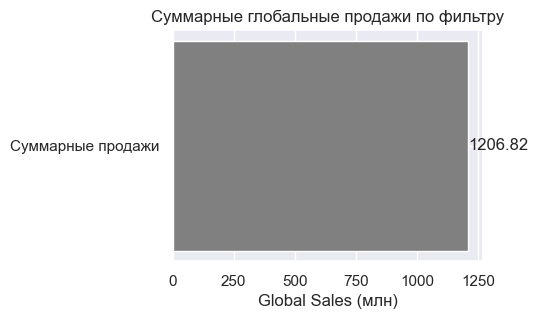

Количество строк в отфильтрованном DataFrame: 5293
Статистические метрики (Глобальные продажи, оценка критиков, оценка пользователей): 
--- Global_Sales ---
  Среднее:  0.18143081761006288
  Медиана:  0.04
  Максимум: 5.24
  Минимум:  0.0
--- Critic_Score ---
  Среднее:  7.329187817258883
  Медиана:  7.5
  Максимум: 10.0
  Минимум:  2.0
--- User_Score ---
  Среднее:  8.415625
  Медиана:  8.8
  Максимум: 10.0
  Минимум:  2.0


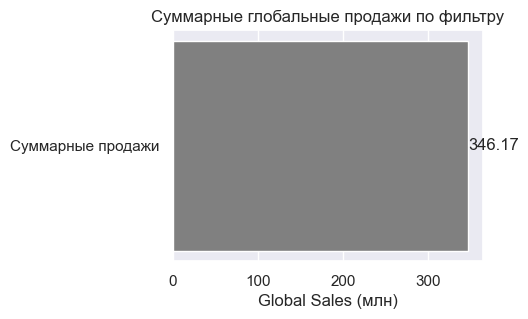

In [17]:
# # Получаем уникальные значения
# unique_years['Year'] = pd.to_numeric(unique_years['Year'], errors='coerce')
# unique_years = sorted([y for y in data['Year'].unique() if y != -1])  # -1 мы обозначили "неизвестное"

unique_years = sorted([int(y) for y in data['Year'].unique() if str(y).isdigit() and int(y) != -1])
# Convert to Pandas Series for dropna() to work
unique_years = pd.Series(unique_years)
# Remove any NaN values that might have resulted from the conversion
unique_years = unique_years.dropna()
# Convert back to a list and sort
unique_years = sorted(unique_years.tolist())

unique_genres = sorted(data['Genre'].unique())
unique_platforms = sorted(data['Platform'].unique())
unique_publishers = sorted(data['Publisher'].unique())
unique_devs = sorted(data['Developer'].unique())

year_dropdown = widgets.Dropdown(
    options=['Все'] + unique_years,
    description='Год:',
    value='Все'
)

genre_dropdown = widgets.Dropdown(
    options=['Все'] + unique_genres,
    description='Жанр:',
    value='Все'
)

platform_dropdown = widgets.Dropdown(
    options=['Все'] + unique_platforms,
    description='Платформа:',
    value='Все'
)

publisher_select = widgets.SelectMultiple(
    options=['Все'] + unique_publishers,
    description='Издатели:',
    value=['Все']
)

dev_select = widgets.SelectMultiple(
    options=['Все'] + unique_devs,
    description='Разработчики:',
    value=['Все']
)

def filter_data(year, genre, platform, publishers, devs) -> pd.DataFrame:
    """
    Фильтрует данные по выбранным параметрам (если 'Все', то игнорируем).
    Возвращает отфильтрованный DataFrame.
    """
    filtered = data.copy()

    # Год
    if year != 'Все':
        if not check_existence_in_dataset('Year', year):
            print("Нет данных по запрошенному году, измените вводимые данные на корректные.")
            return pd.DataFrame()  # Пустой
        filtered = filtered[filtered['Year'] == year]

    # Жанр
    if genre != 'Все':
        if not check_existence_in_dataset('Genre', genre):
            print("Нет данных по запрошенному жанру, измените вводимые данные на корректные.")
            return pd.DataFrame()
        filtered = filtered[filtered['Genre'] == genre]

    # Платформа
    if platform != 'Все':
        if not check_existence_in_dataset('Platform', platform):
            print("Нет данных по запрошенной платформе, измените вводимые данные на корректные.")
            return pd.DataFrame()
        filtered = filtered[filtered['Platform'] == platform]

    # Издатели
    if publishers != ['Все']:
        # Проверим, все ли издатели валидны
        for pub in publishers:
            if pub != 'Все' and not check_existence_in_dataset('Publisher', pub):
                print("Нет данных по запрошенному(ым) издателю(ям), измените вводимые данные на корректные.")
                return pd.DataFrame()
        # Фильтруем, если в списке издателей
        # Если выбрано несколько, оставляем записи, где Publisher входит в publishers
        valid_pubs = [p for p in publishers if p != 'Все']
        if valid_pubs:
            filtered = filtered[filtered['Publisher'].isin(valid_pubs)]

    # Разработчики
    if devs != ['Все']:
        for d in devs:
            if d != 'Все' and not check_existence_in_dataset('Developer', d):
                print("Нет данных по запрошенному(ым) разработчику(ам), измените вводимые данные на корректные.")
                return pd.DataFrame()
        valid_devs = [d for d in devs if d != 'Все']
        if valid_devs:
            filtered = filtered[filtered['Developer'].isin(valid_devs)]

    return filtered


def on_change_filter(*args):
    # Получаем значения виджетов
    year_val = year_dropdown.value
    genre_val = genre_dropdown.value
    platform_val = platform_dropdown.value
    publisher_val = list(publisher_select.value)
    dev_val = list(dev_select.value)

    filtered_data = filter_data(year_val, genre_val, platform_val, publisher_val, dev_val)

    if filtered_data.empty:
        print("Отфильтрованный DataFrame пуст. Проверьте корректность введённых фильтров.")
    else:
        # Выводим небольшое резюме
        print(f"Количество строк в отфильтрованном DataFrame: {len(filtered_data)}")

        # Можно сразу отобразить статистику и мини-график
        print_statistics(filtered_data)
        plot_global_sales_bar(filtered_data)

# Подключаем обработчик к каждому виджету
year_dropdown.observe(on_change_filter, 'value')
genre_dropdown.observe(on_change_filter, 'value')
platform_dropdown.observe(on_change_filter, 'value')
publisher_select.observe(on_change_filter, 'value')
dev_select.observe(on_change_filter, 'value')

display(year_dropdown, genre_dropdown, platform_dropdown, publisher_select, dev_select)

# Вывод топ игр, расчитанного по количеству отправленных копий, которые отсортированны по жанру.
Пользователь задает сколько игр будет в таблице, после выбирает по какому жанру он бы хотел увидеть статистику. Таблица регулируется в размере в зависимости от количества игр в топе. После этого пользователь выбирает из списка жанров тот, который ему интересен.

Доступные жанры:
1. Sports
2. Platform
3. Racing
4. Shooter
5. Role-Playing
6. Puzzle
7. Misc
8. Party
9. Simulation
10. Action
11. Action-Adventure
12. Fighting
13. Strategy
14. Adventure
15. Music
16. MMO
17. Sandbox
18. Visual Novel
19. Board Game
20. Education


C:\Users\pupil\AppData\Local\Temp\ipykernel_10980\3175895616.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Total_Shipped'] = pd.to_numeric(filtered_data['Total_Shipped'], errors='coerce')


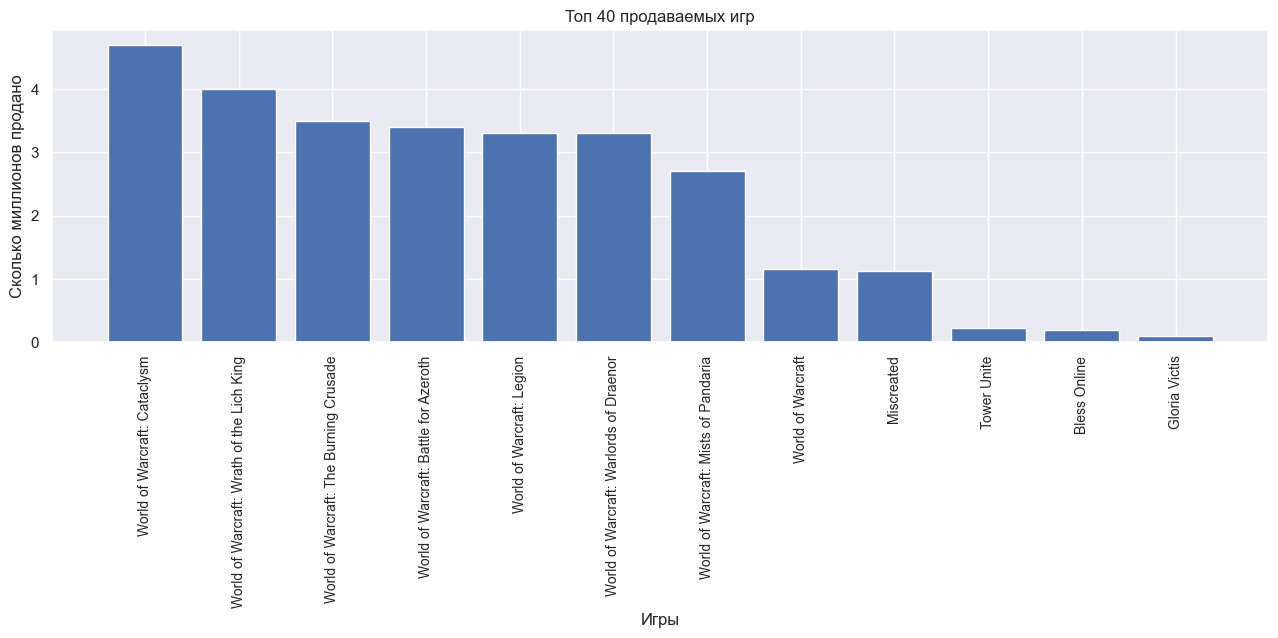

In [19]:
num_top = int(input("Введите, сколько вы хотите увидеть значений в топе: "))
if num_top <= 30:
  size_table = 1
elif num_top <= 60:
  size_table = 2
elif num_top <= 100:
  size_table = 3
else:
  size_table = 6

genres_table = data['Genre'].unique()
print("Доступные жанры:")
for i, genre in enumerate(genres_table):
    print(f"{i + 1}. {genre}")

genre_numb = int(input("Выберите номер жанра, по которому вы хотите получить статистику: ")) - 1
gen = genres_table[genre_numb]

filtered_data = data[data['Genre'] == gen]
filtered_data['Total_Shipped'] = pd.to_numeric(filtered_data['Total_Shipped'], errors='coerce')
top = filtered_data.sort_values(by='Total_Shipped', ascending=False).head(num_top)
total = top['Total_Shipped']
names = top['Name']
plt.bar(names, total)
plt.xlabel("Игры")
plt.ylabel("Сколько миллионов продано")
plt.title(f"Топ {num_top} продаваемых игр")
plt.xticks(rotation=90, fontsize=10)
plt.subplots_adjust(bottom=0.25, left=0.1, right=size_table, top=0.9)
plt.show()

Получение года выпуска игры от пользователя, который позволяет позже получить данные за тот год, который хочет пользователь, выборка данных по запрошенному году, показ глобальных продаж игр выпущенных за указанный год, отсортированные по основному жанру игры.

In [20]:
import datetime
from datetime import datetime
current_year = datetime.now().year

while True:
    try:
        year = int(input("Введите год для анализа (например, 2010): "))

        if 1970 <= year <= current_year:
            print(year)
            break
        else:
            print("Год не верен. Пожалйуста, введите год в актуальном диапазоне, начиная с 1970, до текущего включительно.")
    except ValueError:
        print("Пожалуйста, введите год в числовом формате.")
        # Проверка данных на соответствие

2010



Проданные игры, вышедшие в 2010 году (отсортированные по жанрам, по убыванию):
Genre
Sports              89.39
Action              85.80
Shooter             78.57
Misc                57.14
Role-Playing        42.10
Adventure           29.84
Simulation          25.33
Racing              23.85
Fighting            14.37
Platform             9.24
Strategy             9.10
Puzzle               8.07
MMO                  1.58
Music                0.14
Visual Novel         0.10
Party                0.00
Action-Adventure     0.00
Name: Global_Sales, dtype: float64


C:\Users\pupil\AppData\Local\Temp\ipykernel_10980\11573906.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Global_Sales'] = pd.to_numeric(filtered_data['Global_Sales'], errors='coerce')
C:\Users\pupil\AppData\Local\Temp\ipykernel_10980\11573906.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=sorted_data.index, y=sorted_data.values, ci=None)


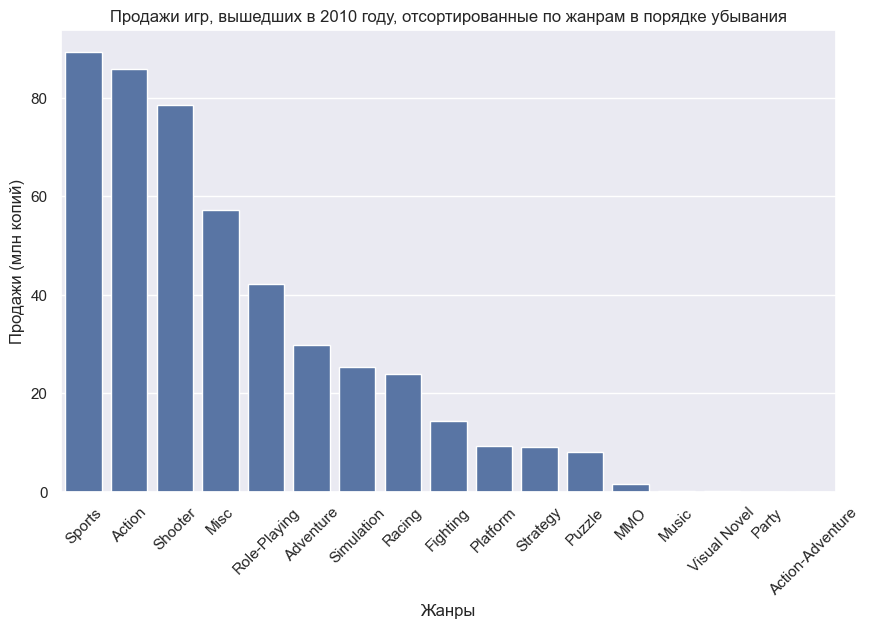

In [21]:
# Фильтрация данных по выбранному году
filtered_data = data[data["Year"] == year]

# Проверка наличия данных за указанный год
if filtered_data.empty:
    print(f"Нет данных за {year} год.")
else:
    # Convert 'Global_Sales' to numeric before grouping
    filtered_data['Global_Sales'] = pd.to_numeric(filtered_data['Global_Sales'], errors='coerce')
    # Сортировка по продажам по убыванию
    sorted_data = filtered_data.groupby("Genre")["Global_Sales"].sum().sort_values(ascending=False)

    # Выводим отсортированные данные
    print(f"\nПроданные игры, вышедшие в {year} году (отсортированные по жанрам, по убыванию):")
    print(sorted_data)

    # Построение графика
    plt.figure(figsize=(10, 6))
    sns.barplot(x=sorted_data.index, y=sorted_data.values, ci=None)
    plt.title(f"Продажи игр, вышедших в {year} году, отсортированные по жанрам в порядке убывания")
    plt.xlabel("Жанры")
    plt.ylabel("Продажи (млн копий)")
    plt.xticks(rotation=45)
    plt.show()

# Добавление в DataFrame

In [22]:
def check_empty_string(string):
  if not string:  # Проверка на пустоту строки
    return "неизвестно"
  else:
    return string
def new_row_create(Name, Genre, ESRB_Rating, Platform, Publisher, Developer, Critic_Score, User_Score, Total_Shipped, Global_Sales, NA_Sales, PAL_Sales, JP_Sales, Other_Sales, Year):
  global data
  new_row = {
      'Rank': len(data) + 1,
      'Name': Name,
      'Genre': Genre,
      'ESRB_Rating': ESRB_Rating,
      'Platform': Platform,
      'Publisher': Publisher,
      'Developer': Developer,
      'Critic_Score': Critic_Score,
      'User_Score': User_Score,
      'Total_Shipped': Total_Shipped,
      'Global_Sales': Global_Sales,
      'NA_Sales': NA_Sales,
      'PAL_Sales': PAL_Sales,
      'JP_Sales': JP_Sales,
      'Other_Sales': Other_Sales,
      'Year': Year
  }
  data = pd.concat([data, pd.DataFrame([new_row])], ignore_index=True)
# data.info()
# data.head()
# data[data['Name'] == 'SSSSS']
# data = pd.concat([data, pd.DataFrame([new_row])], ignore_index=True)
while True:
  Name = input("Введите название игры: ")
  if not Name:
    print("У игры обязетельно должно быть название. Введите название еще раз.")
  else:
    break
genres_table = data['Genre'].unique()
while True:
  print("Доступные жанры:")
  for i, genre in enumerate(genres_table):
      print(f"{i + 1}. {genre}")
  Genre = input("Введите жанр игры: ")

  if Genre in genres_table:
      print(f"Выбранный жанр: {Genre}")
      break  # Выход из цикла, если жанр валидный
  else:
      print("Введённый жанр не найден в списке доступных. Пожалуйста, выберите из списка.")

ESRB_Rating = check_empty_string(input("Введите ESRB рейтинг игры: "))
Platform = check_empty_string(input("Введите платформу игры: "))
Publisher = check_empty_string(input("Введите издателя игры: "))
Developer = check_empty_string(input("Введите разработчика игры: "))
Critic_Score = check_empty_string(input("Введите оценку критиков: "))
User_Score = check_empty_string(input("Введите оценку пользователей: "))
Total_Shipped = check_empty_string(input("Введите количество копий, проданных: "))
Global_Sales = check_empty_string(input("Введите глобальные продажи: "))
NA_Sales = check_empty_string(input("Введите продажи в Северной Америке: "))
PAL_Sales = check_empty_string(input("Введите продажи в Европе, Африку, Южной Америке, Океании и Азии: "))
JP_Sales = check_empty_string(input("Введите продажи в Японии: "))
Other_Sales = check_empty_string(input("Введите другие продажи: "))
Year = check_empty_string(input("Введите год выпуска игры: "))

# genres_table = data['Genre'].unique()
# print("Доступные жанры:")
# for i, genre in enumerate(genres_table):
#     print(f"{i + 1}. {genre}")
new_row_create(Name, Genre, ESRB_Rating, Platform, Publisher, Developer, Critic_Score, User_Score, Total_Shipped, Global_Sales, NA_Sales, PAL_Sales, JP_Sales, Other_Sales, Year)
# new_row_create('AAAA', 'Action', 'E', 'PS2', 'Electronic Arts', 'Electronic Arts', 7, 5, 3, 1, 2, 2, 0.2, 3, 2024)
data[data['Name'] == Name]

Доступные жанры:
1. Sports
2. Platform
3. Racing
4. Shooter
5. Role-Playing
6. Puzzle
7. Misc
8. Party
9. Simulation
10. Action
11. Action-Adventure
12. Fighting
13. Strategy
14. Adventure
15. Music
16. MMO
17. Sandbox
18. Visual Novel
19. Board Game
20. Education
Введённый жанр не найден в списке доступных. Пожалуйста, выберите из списка.
Доступные жанры:
1. Sports
2. Platform
3. Racing
4. Shooter
5. Role-Playing
6. Puzzle
7. Misc
8. Party
9. Simulation
10. Action
11. Action-Adventure
12. Fighting
13. Strategy
14. Adventure
15. Music
16. MMO
17. Sandbox
18. Visual Novel
19. Board Game
20. Education
Выбранный жанр: Simulation


,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year
55792,55793,Dan & What?,Simulation,неизвестно,PC,Steam,Dan Project,6.4,7.3,неизвестно,неизвестно,неизвестно,неизвестно,неизвестно,неизвестно,2025
